## **Analisis Data (E-Commerce Public Dataset)**

- Nama: Jose Bagus Ramadhan
- Email: josebagus4@gmail.com
- ID Dicoding: josebagus

#### Pertanyaan Bisnis:
* Pertanyaan 1: Bagaimana tren penjualan pada setiap bulan?
* Pertanyaan 2: Apa saja 10 kategori produk teratas berdasarkan total penjualan?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Wrangling

##### Gathering Data

In [2]:
import kagglehub
import shutil
import os

# Unduh dataset dari Kaggle menggunakan kagglehub
default_path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
print(f"✅ Dataset berhasil diunduh ke: {default_path}")

# Folder tujuan
destination_folder = "./data"
os.makedirs(destination_folder, exist_ok=True)  # Buat folder jika belum ada

# Pindahkan file dari folder unduhan ke folder 'data'
for file in os.listdir(default_path):
    src_path = os.path.join(default_path, file)
    dst_path = os.path.join(destination_folder, file)

    if os.path.isfile(src_path):
        shutil.move(src_path, dst_path)
        print(f"📁 {file} berhasil dipindahkan ke {destination_folder}")

print("✅ Semua file berhasil dipindahkan.")

✅ Dataset berhasil diunduh ke: C:\Users\ASUS\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2
✅ Semua file berhasil dipindahkan.


In [3]:
# Path folder data
data_folder = './data'

# Loop semua file di folder
for filename in os.listdir(data_folder):
    # Cek apakah file diawali dengan 'olist_'
    if filename.startswith('olist_') and filename.endswith('.csv'):
        old_path = os.path.join(data_folder, filename)
        
        # Buat nama baru tanpa 'olist_'
        new_filename = filename.replace('olist_', '', 1)
        new_path = os.path.join(data_folder, new_filename)
        
        # Hapus file baru jika sudah ada
        if os.path.exists(new_path):
            os.remove(new_path)
        
        # Rename file
        os.rename(old_path, new_path)
        print(f"✅ Rename: {filename} → {new_filename}")


✅ Rename: olist_customers_dataset.csv → customers_dataset.csv
✅ Rename: olist_geolocation_dataset.csv → geolocation_dataset.csv
✅ Rename: olist_orders_dataset.csv → orders_dataset.csv
✅ Rename: olist_order_items_dataset.csv → order_items_dataset.csv
✅ Rename: olist_order_payments_dataset.csv → order_payments_dataset.csv
✅ Rename: olist_order_reviews_dataset.csv → order_reviews_dataset.csv
✅ Rename: olist_products_dataset.csv → products_dataset.csv
✅ Rename: olist_sellers_dataset.csv → sellers_dataset.csv


##### Assessing Data

In [4]:
# Make a DataFrame from the CSV file
df_order = pd.read_csv("./data/orders_dataset.csv")
df_order_items = pd.read_csv("./data/order_items_dataset.csv")
df_product = pd.read_csv("./data/products_dataset.csv")
df_categories = pd.read_csv("./data/product_category_name_translation.csv")

In [5]:
# Display Data 
print("Data Order:")
print("A lot of data:", df_order.shape[0])
display(df_order.head())

print("Data Order Items:")
print("A lot of data:", df_order_items.shape[0])
display(df_order_items.head())

print("Data Product:")
print("A lot of data:", df_product.shape[0])
display(df_product.head())

print("Data Categories:")
print("A lot of data:", df_categories.shape[0])
display(df_categories.head())

Data Order:
A lot of data: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Data Order Items:
A lot of data: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Data Product:
A lot of data: 32951


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Data Categories:
A lot of data: 71


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
# Check the data types
print("Data Types Order:")
display(df_order.dtypes)

print("Data Types Order Items:")
display(df_order_items.dtypes)

print("Data Types Product:")
display(df_product.dtypes)

print("Data Types Categories:")
display(df_categories.dtypes)

Data Types Order:


order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Data Types Order Items:


order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Data Types Product:


product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Data Types Categories:


product_category_name            object
product_category_name_english    object
dtype: object

In [7]:
# Check for duplicates
print("Duplikat - Orders:", df_order.duplicated().sum())
print("Duplikat - Order Items:", df_order_items.duplicated().sum())
print("Duplikat - Products:", df_product.duplicated().sum())
print("Duplikat - Categories:", df_categories.duplicated().sum())

Duplikat - Orders: 0
Duplikat - Order Items: 0
Duplikat - Products: 0
Duplikat - Categories: 0


In [8]:
# Check for missing values
print("Missing Values Order:")
missing_order = df_order.isnull().sum()
print(missing_order[missing_order > 0])

print("\nMissing Values Order Items:")
missing_order_items = df_order_items.isnull().sum()
print(missing_order_items[missing_order_items > 0])

print("\nMissing Values Product:")
missing_product = df_product.isnull().sum()
print(missing_product[missing_product > 0])

print("\nMissing Values Categories:")
missing_categories = df_categories.isnull().sum()
print(missing_categories[missing_categories > 0])

Missing Values Order:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

Missing Values Order Items:
Series([], dtype: int64)

Missing Values Product:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing Values Categories:
Series([], dtype: int64)


##### Cleaning Data

In [9]:
# Drop row with missing values
df_order_clean = df_order.dropna(subset=['order_purchase_timestamp'])
df_product = df_product.dropna(subset=['product_category_name'])

df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

df_merged = pd.merge(df_order_items, df_order_clean, on='order_id', how='left')
df_merged = pd.merge(df_merged, df_product, on='product_id', how='left')
df_merged = pd.merge(df_merged, df_categories, on='product_category_name', how='left')

df_merged['total_sales']= df_merged['price'] + df_merged['freight_value']

df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])
df_merged['month']= df_merged['order_purchase_timestamp'].dt.to_period('M')

main_data = df_merged[['order_id', 'order_purchase_timestamp', 'month', 'product_id', 'product_category_name_english', 'price', 'freight_value', 'total_sales']]
display(main_data.head())

,order_id,order_purchase_timestamp,month,product_id,product_category_name_english,price,freight_value,total_sales
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,2017-09,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,2017-04,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,2018-01,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,2018-08,7634da152a4610f1595efa32f14722fc,perfumery,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,2017-02,ac6c3623068f30de03045865e4e10089,garden_tools,199.90,18.14,218.04


In [48]:
main_data.to_csv('./dashboard/main_data.csv', index=False)

##### Insight Data Wrangling:
Pada tahap data wrangling, data yang digunakan dibersihkan dari nilai kosong dan duplikat. Selain itu, dilakukan konversi tipe data pada kolom tanggal agar bisa dianalisis dengan tepat. Langkah ini penting untuk memastikan bahwa data yang dianalisis memiliki kualitas yang baik dan tidak menghasilkan bias dalam visualisasi maupun analisis lebih lanjut.

### Exploratory Data Analysis

In [27]:
# 1. Tren penjualan bulanan
monthly_sales = main_data.groupby('month')['total_sales'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].dt.strftime('%b %Y')

# 2. Top 10 Kategori paling sering terjual
top_categories = main_data.groupby('product_category_name_english')['total_sales'].sum().reset_index()
top_categories = top_categories.sort_values(by='total_sales', ascending=False)

print("Tren Penjualan Bulanan:")
display(monthly_sales.head())
print("Top 10 Kategori paling sering Terjual:")
display(top_categories.head(10))

Tren Penjualan Bulanan:


,month,total_sales
0,Sep 2016,354.75
1,Oct 2016,56808.84
2,Dec 2016,19.62
3,Jan 2017,137188.49
4,Feb 2017,286280.62


Top 10 Kategori paling sering Terjual:


,product_category_name_english,total_sales
43,health_beauty,1441248.07
70,watches_gifts,1305541.61
7,bed_bath_table,1241681.72
65,sports_leisure,1156656.48
15,computers_accessories,1059272.40
39,furniture_decor,902511.79
49,housewares,778397.77
20,cool_stuff,719329.95
5,auto,685384.32
42,garden_tools,584219.21


##### Insight Exploratory Data Analysis (EDA): 
        
Dari hasil EDA, ditemukan bahwa tren penjualan memiliki fluktuasi setiap bulan, dengan beberapa bulan mengalami lonjakan signifikan. Selain itu, produk dalam kategori tertentu cenderung memiliki penjualan lebih tinggi dibandingkan kategori lainnya, menunjukkan preferensi konsumen terhadap produk tersebut.

### Visualization & Explanatory Analysis

#### Pertanyaan 1: 
Bagaimana tren penjualan pada setiap bulan?

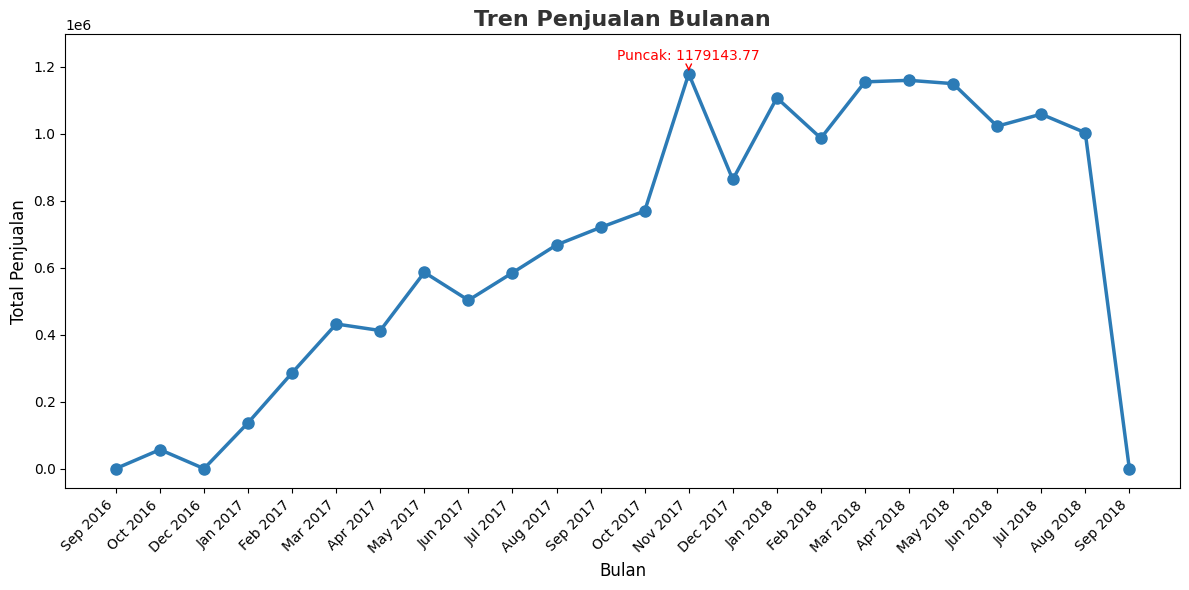

In [40]:
# Visualisasi Tren Penjualan Bulanan
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    monthly_sales['month'],
    monthly_sales['total_sales'],
    color='#2C7BB6',
    marker='o',
    markersize=8,
    linewidth=2.5,
    linestyle='-'
)

# Titik puncak
max_idx = monthly_sales['total_sales'].idxmax()
peak_month = monthly_sales.loc[max_idx, 'month']
peak_value = monthly_sales.loc[max_idx, 'total_sales']

ax.set_ylim(top=peak_value * 1.1)

ax.annotate(
    f'Puncak: {peak_value:.2f}',
    xy=(peak_month, peak_value),
    xytext=(0, 10),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->', color='red'),
    ha='center',
    fontsize=10,
    color='red'
)

ax.set_title('Tren Penjualan Bulanan', fontsize=16, fontweight='bold', color='#333333')
ax.set_xlabel('Bulan', fontsize=12)
ax.set_ylabel('Total Penjualan', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Pertanyaan 2: 
Apa saja 10 kategori produk teratas berdasarkan total penjualan?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13784\4223318244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='product_category_name_english', data=top_categories.head(10), palette='viridis')


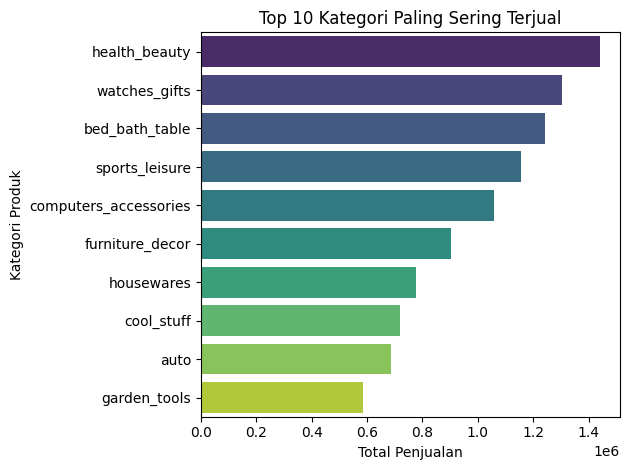

In [23]:
# Visualisasi Top 10 Kategori Paling Sering Terjual
sns.barplot(x='total_sales', y='product_category_name_english', data=top_categories.head(10), palette='viridis')
plt.title('Top 10 Kategori Paling Sering Terjual')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')
plt.tight_layout()
plt.show()

#### Insight Visualisasi Data: 

Visualisasi membantu mempermudah pemahaman terhadap data. Dari grafik tren penjualan bulanan, dapat dilihat bahwa terjadi peningkatan penjualan pada bulan-bulan tertentu yang bisa disebabkan oleh musim liburan atau promo. Grafik 10 kategori produk terlaris juga memberikan wawasan mengenai produk-produk yang paling diminati oleh pelanggan.

### Analisis Lanjutan

**Tren Musiman Penjualan**

Kita bisa menganalisis bulan-bulan dengan lonjakan penjualan:

In [43]:
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df['month'] = monthly_sales_df['month'].astype(str)

# urutkan dan cari outlier musiman
top_months = monthly_sales_df.sort_values(by='total_sales', ascending=False).head(5)
print("Top 5 Bulan dengan Penjualan Tertinggi:")
display(top_months)

Top 5 Bulan dengan Penjualan Tertinggi:


,index,month,total_sales
13,13,Nov 2017,1179143.77
18,18,Apr 2018,1159698.04
17,17,Mar 2018,1155126.82
19,19,May 2018,1149781.82
15,15,Jan 2018,1107301.89


### Kesimpulan dan rekomendasi

1. **Tren Penjualan Bulanan:**

Berdasarkan analisis tren penjualan bulanan, dapat disimpulkan bahwa penjualan mengalami peningkatan yang signifikan dari waktu ke waktu. Terlihat adanya tren pertumbuhan yang konsisten sejak awal tahun 2017 hingga akhir 2017, dengan puncak penjualan terjadi pada bulan November 2017, mencapai total penjualan sekitar 1.179.143,77 BRL. Lonjakan ini kemungkinan besar berkaitan dengan momen promo besar seperti Black Friday atau persiapan akhir tahun yang biasa menjadi periode belanja masyarakat. Setelah puncak tersebut, penjualan tetap berada pada level tinggi meskipun terjadi fluktuasi pada bulan-bulan berikutnya, terutama sepanjang tahun 2018. 

2. **Kategori Produk dengan Penjualan Tertinggi**

Analisis kategori produk berdasarkan total penjualan, ditemukan bahwa kategori health_beauty menjadi yang paling mendominasi, dengan nilai penjualan tertinggi mendekati 1,4 juta BRL. Kategori lain seperti watches_gifts, bed_bath_table, dan sports_leisure juga termasuk dalam daftar kategori dengan performa penjualan yang sangat baik. Hal ini menunjukkan bahwa produk-produk yang berkaitan dengan perawatan diri, dekorasi rumah, dan aktivitas olahraga cenderung memiliki permintaan tinggi. Di sisi lain, kategori seperti auto dan garden_tools juga masuk dalam 10 besar, meskipun total penjualannya lebih rendah, yang menunjukkan adanya potensi pasar pada segmen tertentu.

**Insight berdasarkan keseluruhan analisis**, pelaku bisnis dapat mempertimbangkan strategi pemasaran atau promosi berdasarkan waktu-waktu dengan tren penjualan tinggi. Selain itu, produk-produk populer bisa dijadikan fokus dalam pengelolaan inventaris maupun kampanye penjualan.